In [1]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Load a pre-trained YOLO11 model (nano is smallest & fastest)
model = YOLO("yolov8n.pt")

# Check the model summary (optional, good for teaching)
model.info()


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [6]:
import os
import shutil
import random

!unzip /content/dataset.zip
# === CONFIG ===
image_folder = "A:\GitHub Project\Dataset\Dataset\image"       # your actual images
label_folder = "A:\GitHub Project\Dataset\Dataset\label"     # your .txt files from Makesense
output_folder = "A:\GitHub Project\Projects\Object_Detection\Wildlife detection"      # final dataset folder
class_names = ['bear', 'cat', 'cow', 'coyote', 'objects']      # change this to your actual class name(s)

# === CREATE STRUCTURE ===
os.makedirs(f"{output_folder}/images/train", exist_ok=True)
os.makedirs(f"{output_folder}/images/val", exist_ok=True)
os.makedirs(f"{output_folder}/labels/train", exist_ok=True)
os.makedirs(f"{output_folder}/labels/val", exist_ok=True)

# === MATCH IMAGES & LABELS ===
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]
matched_files = [f for f in image_files if os.path.exists(os.path.join(label_folder, f.rsplit('.', 1)[0] + '.txt'))]

# === SPLIT 80/20 TRAIN/VAL ===
random.shuffle(matched_files)
split_idx = int(0.8 * len(matched_files))
train_files = matched_files[:split_idx]
val_files = matched_files[split_idx:]

def move_files(file_list, split):
    for img in file_list:
        label = img.rsplit('.', 1)[0] + ".txt"
        shutil.copy(os.path.join(image_folder, img), f"{output_folder}/images/{split}/{img}")
        shutil.copy(os.path.join(label_folder, label), f"{output_folder}/labels/{split}/{label}")

move_files(train_files, "train")
move_files(val_files, "val")

# === CREATE data.yaml ===
with open(os.path.join(output_folder, "data.yaml"), "w") as f:
    f.write(f"""path: "A:/GitHub Project/Projects/Object_Detection/Wildlife detection"
train: images/train
val: images/val

names:
""")
    for i, name in enumerate(class_names):
        f.write(f"  {i}: {name}\n")


print("✅ Dataset prepared for YOLOv8!")


'unzip' is not recognized as an internal or external command,
operable program or batch file.


✅ Dataset prepared for YOLOv8!


In [7]:
model.train(
    data= "A:\GitHub Project\Projects\Object_Detection\Wildlife detection\data.yaml",
    epochs=50,
    imgsz=640,
    degrees=10,       # rotation
    scale=0.5,        # image scaling
    shear=2.0,        # shearing
    perspective=0.001,  # perspective transform
    flipud=0.5,       # vertical flip with 50% probability
    fliplr=0.5,       # horizontal flip with 50% probability
    hsv_h=0.015,      # hue augmentation
    hsv_s=0.7,        # saturation augmentation
    hsv_v=0.4,      # value augmentation
    cache=False

)




Ultralytics 8.3.96  Python-3.9.18 torch-2.5.1 CPU (AMD Ryzen 9 8945HS w/ Radeon 780M Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=A:\GitHub Project\Projects\Object_Detection\Wildlife detection\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

train: Scanning A:\GitHub Project\Projects\Object_Detection\Wildlife detection\labels\train... 550 images, 0 backgrounds, 0 corrupt: 100%|██████████| 550/550 [00:00<00:00, 619.93it/s]


train: New cache created: A:\GitHub Project\Projects\Object_Detection\Wildlife detection\labels\train.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 1382, len(boxes) = 1413. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning A:\GitHub Project\Projects\Object_Detection\Wildlife detection\labels\val... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<00:00, 737.32it/s]

val: New cache created: A:\GitHub Project\Projects\Object_Detection\Wildlife detection\labels\val.cache


WARNING  Box and segment counts should be equal, but got len(segments) = 525, len(boxes) = 534. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.691      3.224      1.986         26        640: 100%|██████████| 35/35 [02:02<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.78s/it]

                   all        206        534    0.00794      0.667      0.138      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G       1.76      2.756      2.009         34        640: 100%|██████████| 35/35 [01:57<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.57s/it]

                   all        206        534      0.422      0.259      0.164     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.774      2.626      2.017         68        640: 100%|██████████| 35/35 [01:43<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.62s/it]

                   all        206        534        0.5      0.158      0.139     0.0748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G       1.79      2.586      2.015         85        640: 100%|██████████| 35/35 [01:49<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.86s/it]

                   all        206        534      0.408      0.195      0.121     0.0574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.761      2.501      2.006         25        640: 100%|██████████| 35/35 [02:05<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.11s/it]

                   all        206        534      0.532      0.273      0.239      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.788      2.445      2.008         27        640: 100%|██████████| 35/35 [01:53<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.95s/it]

                   all        206        534      0.506      0.204      0.179     0.0941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.719      2.358      1.975         25        640: 100%|██████████| 35/35 [01:56<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.75s/it]

                   all        206        534      0.611      0.255      0.236       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.713      2.321      1.946         36        640: 100%|██████████| 35/35 [01:47<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.70s/it]

                   all        206        534      0.694      0.264      0.266      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.684      2.296      1.958         43        640: 100%|██████████| 35/35 [01:41<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.61s/it]

                   all        206        534      0.612      0.222      0.238      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.649      2.251      1.935         21        640: 100%|██████████| 35/35 [01:45<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.57s/it]

                   all        206        534       0.69      0.237      0.218      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.626      2.207       1.91         41        640: 100%|██████████| 35/35 [01:45<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.67s/it]

                   all        206        534      0.703      0.297      0.317      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.655      2.201      1.919         38        640: 100%|██████████| 35/35 [01:51<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.57s/it]

                   all        206        534      0.784      0.259       0.49       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.588      2.135      1.876         39        640: 100%|██████████| 35/35 [01:45<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.57s/it]

                   all        206        534      0.793      0.297      0.453      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.612      2.085      1.885         33        640: 100%|██████████| 35/35 [01:44<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.52s/it]

                   all        206        534      0.797      0.294       0.33      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.593      2.069      1.872         21        640: 100%|██████████| 35/35 [01:59<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.71s/it]

                   all        206        534      0.884      0.341      0.384      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.613      2.023      1.871         51        640: 100%|██████████| 35/35 [01:56<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.69s/it]

                   all        206        534       0.72      0.262      0.323      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.586      2.081      1.862         31        640: 100%|██████████| 35/35 [01:50<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.52s/it]

                   all        206        534      0.717      0.287      0.304      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.566      2.009      1.843         27        640: 100%|██████████| 35/35 [01:49<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.47s/it]

                   all        206        534      0.872      0.346      0.415      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.539      1.953      1.833         34        640: 100%|██████████| 35/35 [01:40<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.61s/it]

                   all        206        534       0.86      0.334      0.482      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.581       1.95      1.862         23        640: 100%|██████████| 35/35 [01:44<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.68s/it]

                   all        206        534      0.799      0.356      0.386      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.555      1.896      1.837         37        640: 100%|██████████| 35/35 [01:49<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.54s/it]

                   all        206        534      0.756      0.342      0.374      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.491      1.867      1.803         24        640: 100%|██████████| 35/35 [01:48<00:00,  3.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.47s/it]

                   all        206        534      0.909      0.337      0.406       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.508      1.842      1.823         28        640: 100%|██████████| 35/35 [01:43<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.63s/it]

                   all        206        534      0.881      0.359      0.512      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.491      1.826      1.788         31        640: 100%|██████████| 35/35 [01:47<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.51s/it]

                   all        206        534      0.855      0.364      0.409      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.475      1.797      1.784         32        640: 100%|██████████| 35/35 [01:41<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.47s/it]

                   all        206        534      0.877      0.342      0.424      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      26/50         0G       1.48       1.77      1.771         56        640: 100%|██████████| 35/35 [01:42<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.53s/it]

                   all        206        534      0.925      0.373      0.432      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      27/50         0G      1.481      1.786      1.769         32        640: 100%|██████████| 35/35 [01:41<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.51s/it]

                   all        206        534       0.87      0.335      0.409      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      28/50         0G      1.469      1.769      1.758         27        640: 100%|██████████| 35/35 [01:42<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        206        534      0.885      0.364      0.428      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      29/50         0G      1.438      1.704      1.731         32        640: 100%|██████████| 35/35 [01:42<00:00,  2.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

                   all        206        534      0.912      0.357       0.43      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.429      1.724      1.733         30        640: 100%|██████████| 35/35 [01:41<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.50s/it]

                   all        206        534      0.843      0.365      0.437      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      31/50         0G       1.42      1.672      1.736         38        640: 100%|██████████| 35/35 [01:41<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

                   all        206        534      0.888      0.387      0.552      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      32/50         0G      1.415      1.686      1.733         29        640: 100%|██████████| 35/35 [01:41<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

                   all        206        534      0.914      0.395      0.567      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.427      1.643      1.739         31        640: 100%|██████████| 35/35 [01:40<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        206        534      0.927      0.386      0.534      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      34/50         0G      1.396      1.622      1.711         43        640: 100%|██████████| 35/35 [01:41<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        206        534      0.926      0.392      0.486      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      35/50         0G      1.409      1.623      1.714         29        640: 100%|██████████| 35/35 [01:40<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.47s/it]

                   all        206        534      0.887      0.387      0.452       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      36/50         0G      1.412      1.582       1.71         40        640: 100%|██████████| 35/35 [01:41<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.47s/it]

                   all        206        534      0.879      0.391      0.471       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.373      1.614      1.697         41        640: 100%|██████████| 35/35 [01:40<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        206        534      0.915      0.396      0.515      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      38/50         0G       1.38      1.561      1.698         30        640: 100%|██████████| 35/35 [01:41<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.47s/it]

                   all        206        534      0.949      0.395      0.672      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      39/50         0G      1.362      1.555       1.67         33        640: 100%|██████████| 35/35 [01:40<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        206        534      0.936      0.399      0.577      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      40/50         0G      1.354      1.536       1.66         42        640: 100%|██████████| 35/35 [01:41<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

                   all        206        534       0.92      0.391      0.499       0.35
Closing dataloader mosaic


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.436      1.797      1.848         12        640: 100%|██████████| 35/35 [01:39<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

                   all        206        534      0.913      0.384      0.495      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      42/50         0G      1.356      1.606      1.828         20        640: 100%|██████████| 35/35 [01:39<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.50s/it]

                   all        206        534      0.904      0.403      0.524      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      43/50         0G      1.364      1.576      1.815         12        640: 100%|██████████| 35/35 [01:38<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.51s/it]

                   all        206        534      0.945      0.398      0.596      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      44/50         0G       1.33      1.543      1.778         16        640: 100%|██████████| 35/35 [01:38<00:00,  2.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        206        534      0.939      0.404      0.554       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.316       1.47      1.758         17        640: 100%|██████████| 35/35 [01:38<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        206        534      0.919      0.405       0.53      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      46/50         0G      1.317      1.469      1.757         12        640: 100%|██████████| 35/35 [01:38<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        206        534       0.92      0.405       0.56      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      47/50         0G      1.281      1.431      1.746         15        640: 100%|██████████| 35/35 [01:38<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

                   all        206        534      0.951        0.4      0.667      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      48/50         0G      1.286      1.433      1.746         18        640: 100%|██████████| 35/35 [01:38<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

                   all        206        534      0.932      0.416      0.575      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      49/50         0G      1.294      1.436      1.749         12        640: 100%|██████████| 35/35 [01:38<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

                   all        206        534      0.923      0.416      0.588      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.293       1.43      1.734         26        640: 100%|██████████| 35/35 [01:38<00:00,  2.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]

                   all        206        534      0.948      0.411      0.641      0.438



50 epochs completed in 1.616 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.96  Python-3.9.18 torch-2.5.1 CPU (AMD Ryzen 9 8945HS w/ Radeon 780M Graphics)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.29s/it]


                   all        206        534       0.95      0.395      0.672      0.445
                  bear         48         98      0.968        0.5      0.608       0.44
                   cat         50        107      0.904      0.514       0.58      0.414
                   cow         56        229      0.911       0.41      0.509      0.342
                coyote         53         98      0.966      0.551      0.669      0.482
               objects          2          2          1          0      0.995      0.548
Speed: 1.0ms preprocess, 37.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000017A022D6C40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
    

In [9]:
metrics = model.val(data="A:\GitHub Project\Projects\Object_Detection\Wildlife detection\data.yaml")
print("Validation Metrics:", metrics)

# --- Save the Fine-Tuned Model ---
best_model_path = r"A:\GitHub Project\Projects\Object_Detection\runs\detect\train\weights\best.pt"
destination_model_path = "A:\GitHub Project\Projects\Object_Detection\Wildlife detection\wildlide_model\wildlife.pt"
shutil.copy(best_model_path, destination_model_path)
print(f"Training complete. The best model has been saved as {destination_model_path}.")

Ultralytics 8.3.96  Python-3.9.18 torch-2.5.1 CPU (AMD Ryzen 9 8945HS w/ Radeon 780M Graphics)


val: Scanning A:\GitHub Project\Projects\Object_Detection\Wildlife detection\labels\val.cache... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 525, len(boxes) = 534. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]


                   all        206        534      0.949      0.393      0.673      0.445
                  bear         48         98      0.968        0.5      0.617      0.444
                   cat         50        107      0.908      0.505      0.582      0.413
                   cow         56        229      0.906       0.41       0.51       0.34
                coyote         53         98      0.964      0.551      0.663      0.478
               objects          2          2          1          0      0.995      0.548
Speed: 0.8ms preprocess, 31.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train3
Validation Metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000017A695C9280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Con

In [5]:
results = model.predict(r"C:\Users\patel\Downloads\istockphoto-178731641-612x612.jpg", save=True, conf=0.1)



image 1/1 C:\Users\patel\Downloads\istockphoto-178731641-612x612.jpg: 448x640 2 sheeps, 2 bears, 105.1ms
Speed: 8.5ms preprocess, 105.1ms inference, 13.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict


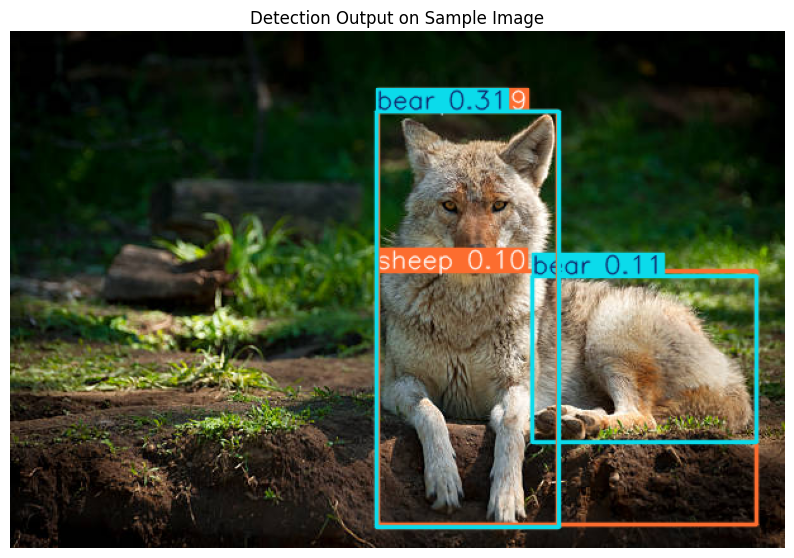

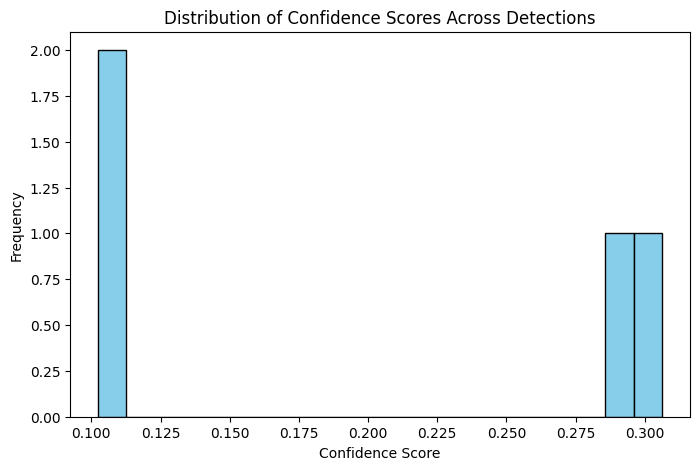

In [ ]:
annotated_img = results[0].plot()

# Convert the image from BGR (OpenCV format) to RGB for correct color display in matplotlib
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img_rgb)
plt.axis("off")
plt.title("Detection Output on Sample Image")
plt.show()

# Extract confidence scores from the detections for analysis
confidences = []
for result in results:
    # Check if there are any detected boxes
    if result.boxes is not None and len(result.boxes) > 0:
        confidences.extend(result.boxes.conf.cpu().numpy())

plt.figure(figsize=(8, 5))
plt.hist(confidences, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.title("Distribution of Confidence Scores Across Detections")
plt.show()